In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
penguins_data = pd.read_csv('penguins.csv')

# Drop rows with missing values
penguins_data.dropna(inplace=True)

# Select features and target variable
X = penguins_data[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
y = penguins_data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


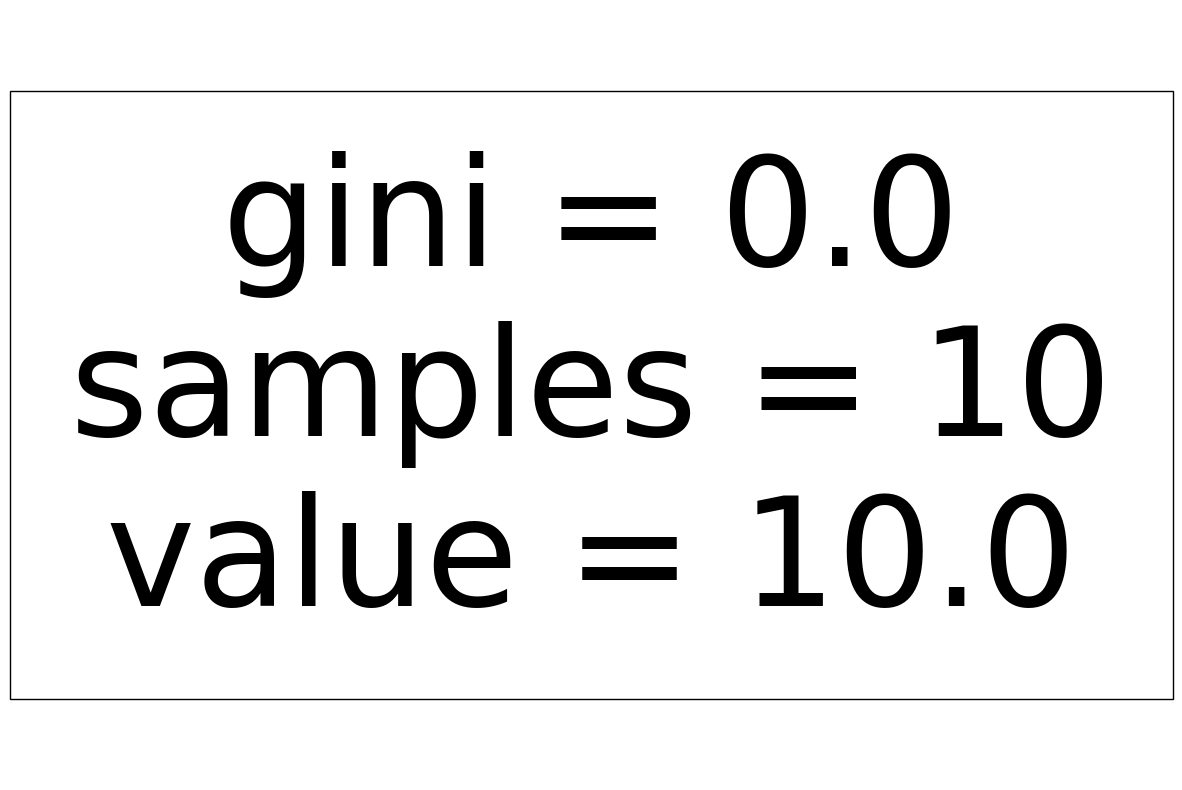

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()


In [37]:
# Extracting root node information
root_feature = clf.tree_.feature[0]  # Index of the feature used for the root split
root_threshold = clf.tree_.threshold[0]  # Threshold value for the root split

# Getting feature name
feature_name = X.columns[root_feature]

print("Root condition:")
print(f"If {feature_name} <= {root_threshold}, go left; otherwise, go right.")


Root condition:
If Flipper Length (mm) <= -2.0, go left; otherwise, go right.


In [38]:
# Collect the measurements of the penguin of unknown species
unknown_penguin = pd.DataFrame({
    'Culmen Length (mm)': [45.0],
    'Culmen Depth (mm)': [17.5],
    'Flipper Length (mm)': [200.0],
    'Body Mass (g)': [3800.0]
})

# Predict the species of the unknown penguin
predicted_species = clf.predict(unknown_penguin)

# Print the predicted species
print("Predicted Species:", predicted_species[0])


Predicted Species: Adelie Penguin (Pygoscelis adeliae)
